# 探索贸易数据网络

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from module.trade_table import TradeTable

total = pd.read_csv(r"../data/total_nvwi_inner.csv")

In [2]:
def export_virtue_water_matrix(data, y):
    case = data.groupby("Year").get_group(y)
    case.index = case["Province Name"]
    case = case.iloc[:, 3:]
    matrix = case[case < 0].abs().fillna(0.)
    return matrix

test_data = TradeTable(export_virtue_water_matrix(total, 2000))
test_data.head()

,Wheat,Maize,Rice,Sorghum,Barley,Millet,Potato,Sweetpotato,Soybean,Groundnuts,...,Sugarbeet,Sugarcane,Cotton,Spinach,Tomato,Cabbage,Apple,Grape,Tea,Tobacco
Province Name,,,,,,,,,,,,,,,,,,,,,
Beijing,0.00000,87.957680,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,4.494648,0.0,2.352914,0.000000,2.497057,0.0,0.0
Tianjin,0.00000,68.673227,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,8.334076,0.0,21.281680,0.000000,19.119417,0.0,0.0
Hebei,10410.91777,5111.149301,0.0,0.000000,0.000000,478.979776,0.000000,0.0,0.000000,509.34858,...,0.000000,0.0,664.736074,0.000000,0.0,0.000000,0.000000,50.305968,0.0,0.0
Shanxi,0.00000,1301.041945,0.0,160.922394,0.000000,704.366052,0.000000,0.0,0.000000,0.00000,...,0.936560,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
Neimeng,0.00000,1858.287722,0.0,175.644680,39.356371,265.529088,456.957766,0.0,1042.863066,0.00000,...,73.659157,0.0,0.000000,0.000000,0.0,0.000000,477.138096,0.000000,0.0,0.0


14.903225806451612

True

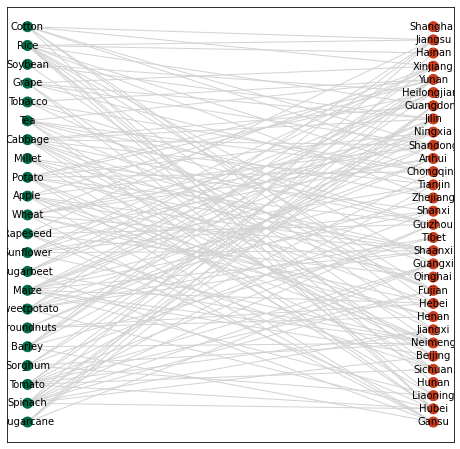

In [4]:
import networkx as nx

graph = test_data.get_graph()
test_data.mean_nbr_degree(depth=3)
nx.is_bipartite(graph)

top = test_data.columns.tolist()
pos = nx.bipartite_layout(graph, top)
fig, ax = plt.subplots(figsize=(8, 8))
color_map = [nx.get_node_attributes(graph, 'color')[n] for n in graph]
nx.drawing.nx_pylab.draw_networkx(graph, pos=pos, node_color=color_map, node_size=100, font_size=10, edge_color='lightgray', ax=ax)